## Ejercicio 3. 

Nos piden aplicar las funciones para:

***[1]***: Calcular el autovector asociado al autovalor más chico de la matríz L.

***[2]***: Calcular el autovector asociado al autovalor más grande de R.

Además, interpretar los valores que nos dan en términos del grafo.

También nos piden calcular los vectores ***s*** asociados a estos autovectores y comparar con la particion esperada con el grafo de ejemplo.


In [1]:
import numpy as np
from linalg import *

In [2]:
# Grafo de ejemplo
A_sample = np.array([
    [0, 1, 1, 1, 0, 0, 0, 0],
    [1, 0, 1, 1, 0, 0, 0, 0],
    [1, 1, 0, 1, 0, 0, 0, 0],
    [1, 1, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 1, 1],
    [0, 0, 0, 0, 1, 0, 1, 1],
    [0, 0, 0, 0, 1, 1, 0, 1],
    [0, 0, 0, 0, 1, 1, 1, 0]
])

# Función para obtener el vector s
comunidades = lambda autovector: [1 if x > 0 else -1 for x in autovector] 

***[1]*** Calculamos el autovector asociado al segundo autovalor más chico de L ($\lambda>0$)

Este $\lambda_{min}$ esta asociado a un autovector $v_{min} \in \Re^{N}$ que se interpreta como.
$$\begin{cases}
    sign(v_i) = 1 & \text{ si museo}_i \in \text{comunidadA} \\
    sign(v_i) = -1 & \text{ si museo}_i \in \text{comunidadB} \\
\end{cases}$$ 

***N***: cantidad de musos

<center> <img src='img/comunidades_L.png' width=500, height=300> </center>

In [3]:
L_sample = calcula_L(A_sample)
segundo_autovalor_minimo_L, segundo_autovector_minimo_L = metpotI2(L_sample, mu=1e-5)

print("Segundo autovalor mínimo de L:", segundo_autovalor_minimo_L)
print("Comunidades (s): ", comunidades(segundo_autovector_minimo_L))

Segundo autovalor mínimo de L: 9.999999999919938e-06
Comunidades (s):  [-1, -1, -1, -1, 1, 1, 1, 1]


***[2]***: Calcular el autovector asociado al autovalor más grande de R.

Este $\lambda_{max}$ esta asociado a un autovector $v_ \in \Re^{N}$ que se interpreta como.
$$\begin{cases}
    sign(v_i) = 1 & \text{ si museo}_i \in \text{comunidadA} \\
    sign(v_i) = -1 & \text{ si museo}_i \in \text{comunidadB} \\
\end{cases}$$ 

<center> <img src='img/comunidades_R.png' width=500, height=300> </center>

In [4]:
R_sample = calcula_R(A_sample)
autovalor_maximo_R, autovector_maximo_R = metpot(R_sample)

print("Autovalor máximo para R:", autovalor_maximo_R)
print("Comunidades (s): ", comunidades(autovector_maximo_R))

Autovalor máximo para R: -2.6826903902575614
Comunidades (s):  [1, 1, 1, 1, 1, 1, 1, 1]


## Ejercicio 4.

In [5]:
import geopandas as gpd 
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import networkx as nx
from template_funciones import * 

/home/sebastian/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [6]:
museos = gpd.read_file('https://raw.githubusercontent.com/MuseosAbiertos/Leaflet-museums-OpenStreetMap/refs/heads/principal/data/export.geojson')
barrios = gpd.read_file('https://cdn.buenosaires.gob.ar/datosabiertos/datasets/ministerio-de-educacion/barrios/barrios.geojson')
D = museos.to_crs("EPSG:22184").geometry.apply(lambda g: museos.to_crs("EPSG:22184").distance(g)).round().to_numpy()
M = [3, 5, 10, 50]

def construir_grafo(A):
    G = nx.from_numpy_array(A) # Construimos la red a partir de la matriz de adyacencia
    # Construimos un layout a partir de las coordenadas geográficas
    G_layout = {i:v for i,v in enumerate(zip(museos.to_crs("EPSG:22184").get_coordinates()['x'],museos.to_crs("EPSG:22184").get_coordinates()['y']))}
    return G, G_layout

In [7]:
def graficar_particion(A, comunidades, titulo, ax, colores):

    # Graficamos los barrios
    barrios.to_crs("EPSG:22184").boundary.plot(color='gray', ax=ax)

    # Construimos el grafo
    G, G_layout = construir_grafo(A)

    # Generamos colores para las particiones
    colores = plt.cm.Set1(np.linspace(0, 1, len(comunidades)))

    # Crear diccionario de colores para cada nodo
    node_colors = {}
    for i, particion in enumerate(comunidades):
        for nodo in particion:
            node_colors[nodo] = colores[i]

    # Crear lista de colores en el orden de los nodos del grafo
    node_color_list = [node_colors.get(nodo, 'lightgray') for nodo in G.nodes()]

    # Dibujar el grafo con colores por partición
    nx.draw_networkx_nodes(G, G_layout, 
                            node_color=node_color_list, 
                            node_size=300, 
                            alpha=0.8, 
                            ax=ax)

    # nx.draw_networkx_labels(G, G_layout, 
    #                         font_size=8, 
    #                         font_color='white', 
    #                         font_weight='bold', 
    #                         ax=ax)

    # Agregar leyenda
    legend_elements = [Line2D([0], [0], marker='o', color='w', 
                                markerfacecolor=colores[i], markersize=10, 
                                label=f'Partición {i+1}')
                        for i in range(len(comunidades))]

    # ax.legend(handles=legend_elements, loc='upper right')

    # ax.title('Red con particiones coloreadas')


#### Particiones óptimas calculadas con el método de modularidad:

TypeError: 'function' object is not subscriptable

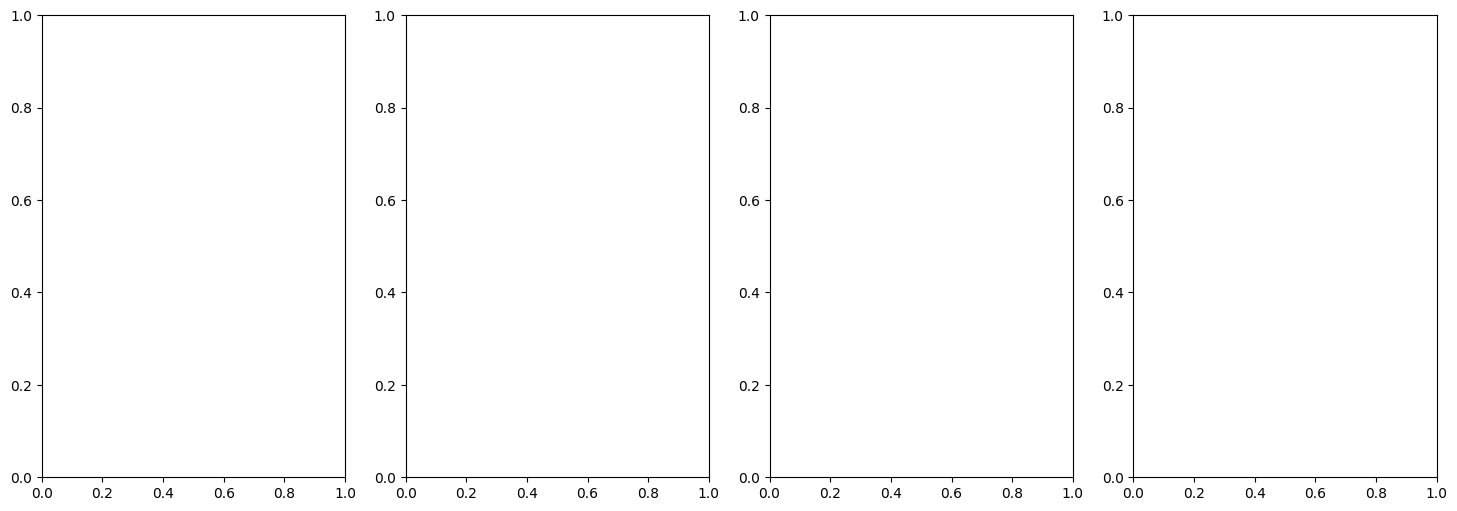

In [ ]:
fig, axes = plt.subplots(1, len(M), figsize=(18, 6))

for i, m in enumerate(M):
    A = simetrizar_A(construye_adyacencia(D, m))
    comunidades = modularidad_iterativo(A)
    graficar_particion(A, comunidades[i], titulo=f"Partición óptima con modularidad {m}", ax=axes[i])

plt.tight_layout()
plt.show()

#### Particiones óptimas calculadas con el método de Laplaciano:

In [ ]:
for A in matrices_A:
    particiones = laplaciano_iterativo(A, niveles=1)
    

560.0